# CatBoost Regression model

In [ ]:
# import packages 

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# import ML packages 
import catboost as cb
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import metrics

import pickle

### Import &amp; split data

In [ ]:
"""
Since Catboost can handle text and not only int input, the dataset is import before its previous split.

"""

'\nSince Catboost can handle text and not only int input, the dataset is import before its previous split.\n\n'

In [ ]:
# import data 

gold_data_model = pd.read_csv("silver_data_model.csv")

In [ ]:
# train data 2019-2022.01
train_data_1 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 1)]
train_data_2 = gold_data_model.loc[gold_data_model['year'] <= 2021]

train_data = pd.concat([train_data_1,train_data_2])

# test data 2022.02-2022.03: 
test_data_1 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 2)]

test_data_2 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 3)]

test_data = pd.concat([test_data_1,test_data_2])


# view shape 
print(train_data.shape, test_data.shape)

(3422, 16) (178, 16)


In [ ]:
train_data.max()

bfe                     100179329
gov_property_value      5400000.0
gov_land_value          1021400.0
sold_price                6600000
unit_sqm_resi               208.0
rooms                           7
street_name           Østrigsgade
street_number                 305
longitude               12.635113
latitude                55.668704
building_year              2021.0
gov_sqm                     302.0
sold_date              2022-01-31
year                         2022
month                          12
floor                        14.0
dtype: object

In [ ]:
train_data.columns

Index(['bfe', 'gov_property_value', 'gov_land_value', 'sold_price',
       'unit_sqm_resi', 'rooms', 'street_name', 'street_number', 'longitude',
       'latitude', 'building_year', 'gov_sqm', 'sold_date', 'year', 'month',
       'floor'],
      dtype='object')

In [ ]:
# drop col for train
train_data = train_data.drop(columns=[
    #'street_name',
    #'year',
    'sold_date',
    #'bfe'
    ]) 

# drop col for test
test_data = test_data.drop(columns=[
    #'street_name',
    #'year',
    'sold_date',
    #'bfe'
    ]) 

In [ ]:
# split TRAIN and drop target aka. sold_price

X_train = train_data.drop(['sold_price'], axis= 1)
y_train = train_data['sold_price']
print(X_train.shape, y_train.shape)

# split TEST and drop target aka. sold_price

X_test = test_data.drop(['sold_price'], axis= 1)
y_test = test_data['sold_price']
print(X_test.shape, y_test.shape)

(3422, 14) (3422,)
(178, 14) (178,)


In [ ]:
X_train.columns

Index(['bfe', 'gov_property_value', 'gov_land_value', 'unit_sqm_resi', 'rooms',
       'street_name', 'street_number', 'longitude', 'latitude',
       'building_year', 'gov_sqm', 'year', 'month', 'floor'],
      dtype='object')

## CatBoost

### Default settings

In [ ]:
default_catb = CatBoostRegressor().fit(cb.Pool(X_train, y_train, cat_features= ['street_name']))


1:	learn: 1127656.6044959	total: 75.7ms	remaining: 37.8s
2:	learn: 1085084.6508553	total: 78.1ms	remaining: 26s
3:	learn: 1048383.7363312	total: 80.8ms	remaining: 20.1s
4:	learn: 1010131.9683547	total: 83.6ms	remaining: 16.6s
5:	learn: 975019.5213633	total: 85.8ms	remaining: 14.2s
6:	learn: 940265.4024695	total: 88.3ms	remaining: 12.5s
7:	learn: 907425.1741236	total: 90.9ms	remaining: 11.3s
8:	learn: 877205.3011326	total: 93.3ms	remaining: 10.3s
9:	learn: 848741.7066477	total: 96ms	remaining: 9.5s
10:	learn: 821918.6673714	total: 98.3ms	remaining: 8.84s
11:	learn: 795546.4677451	total: 101ms	remaining: 8.29s
12:	learn: 770704.7262446	total: 103ms	remaining: 7.81s
13:	learn: 745685.4050250	total: 105ms	remaining: 7.42s
14:	learn: 722017.7949836	total: 108ms	remaining: 7.07s
15:	learn: 700959.7685688	total: 110ms	remaining: 6.78s
16:	learn: 679915.5706628	total: 170ms	remaining: 9.82s
17:	learn: 660350.4122977	total: 173ms	remaining: 9.42s
18:	learn: 642389.0989657	total: 175ms	remaining

In [ ]:
# evaluate 

y_true = y_test # real values 
y_pred_default_catb = default_catb.predict(X_test) # predicted values 

r2_default_catb = round(metrics.r2_score(y_true, y_pred_default_catb), 4)
mae_default_catb = round(metrics.mean_absolute_error(y_true, y_pred_default_catb),2)
mape_default_catb = round(metrics.mean_absolute_percentage_error(y_true, y_pred_default_catb),4)

eval_dict_default_catb = {'R2': r2_default_catb, 'MAE': mae_default_catb, 'MAPE': mape_default_catb}
eval_default_catb = pd.DataFrame.from_dict(eval_dict_default_catb, orient='index').transpose()

eval_default_catb

,R2,MAE,MAPE
0,0.9392,210215.45,0.0661


In [ ]:
default_catb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0

### Stooooop - Gridsearch

In [ ]:
"""
catb_model = CatBoostRegressor()

parameters = {
    'depth'         : [6],
    'iterations'    : [18000, 19000, 20001]
    }

grid_model = GridSearchCV(
    estimator=catb_model, 
    param_grid = parameters, 
    cv = 3, 
    verbose = 100)
    
grid_model.fit(X_train, y_train, cat_features=['street_name'] )
"""

"\ncatb_model = CatBoostRegressor()\n\nparameters = {\n    'depth'         : [6],\n    'iterations'    : [18000, 19000, 20001]\n    }\n\ngrid_model = GridSearchCV(\n    estimator=catb_model, \n    param_grid = parameters, \n    cv = 3, \n    verbose = 100)\n    \ngrid_model.fit(X_train, y_train, cat_features=['street_name'] )\n"

In [ ]:
"""
print("\n The best estimator across ALL searched params:\n", grid_model.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_model.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_model.best_params_)
"""

'\nprint("\n The best estimator across ALL searched params:\n", grid_model.best_estimator_)\nprint("\n The best score across ALL searched params:\n", grid_model.best_score_)\nprint("\n The best parameters across ALL searched params:\n", grid_model.best_params_)\n'

### Stooop building model with best param

In [ ]:
# hot one encoded setup - only run if its needed
"""
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
"""

"""
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
"""

'\nX_train = pd.read_csv("X_train.csv")\ny_train = pd.read_csv("y_train.csv")\n\nX_test = pd.read_csv("X_test.csv")\ny_test = pd.read_csv("y_test.csv")\n'

In [ ]:
train_dataset = cb.Pool(X_train, y_train, cat_features=['street_name']) 
test_dataset = cb.Pool(X_test, y_test, cat_features= ['street_name'])

cat_model = cb.CatBoostRegressor(
    eval_metric = 'MAE',  
    n_estimators= 20000, 
    depth =6).fit(
        train_dataset,
        verbose=1000)

Learning rate set to 0.004354
0:	learn: 1003112.5815221	total: 2.66ms	remaining: 53.2s
1000:	learn: 235494.4076502	total: 4.24s	remaining: 1m 20s
2000:	learn: 202955.9316504	total: 8.69s	remaining: 1m 18s
3000:	learn: 184693.5593598	total: 12.5s	remaining: 1m 10s
4000:	learn: 172673.6202627	total: 16.6s	remaining: 1m 6s
5000:	learn: 163066.5104491	total: 20.5s	remaining: 1m 1s
6000:	learn: 155139.0754906	total: 24.6s	remaining: 57.3s
7000:	learn: 148621.9206990	total: 28.4s	remaining: 52.7s
8000:	learn: 142839.3702350	total: 32.2s	remaining: 48.3s
9000:	learn: 137525.8104272	total: 35.7s	remaining: 43.6s
10000:	learn: 132837.0104219	total: 37.7s	remaining: 37.7s
11000:	learn: 128549.4381567	total: 39.6s	remaining: 32.4s
12000:	learn: 124529.2622433	total: 41.5s	remaining: 27.6s
13000:	learn: 120809.0835250	total: 43.4s	remaining: 23.4s
14000:	learn: 117290.7871290	total: 45.3s	remaining: 19.4s
15000:	learn: 113972.7743426	total: 47.2s	remaining: 15.7s
16000:	learn: 110868.7948566	total

### Evaluate 

In [ ]:
# evaluate 

y_true = y_test # real values 
y_pred = cat_model.predict(X_test) # predicted values 

r2 = round(metrics.r2_score(y_true, y_pred), 4)
mae = round(metrics.mean_absolute_error(y_true, y_pred),2)
mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred),4)

eval_dict = {'R2': r2, 'MAE': mae, 'MAPE': mape}
eval_df = pd.DataFrame.from_dict(eval_dict, orient='index').transpose()

eval_df

,R2,MAE,MAPE
0,0.9423,203834.26,0.0647


In [ ]:
# save results to csv

df_results = X_test
df_results['y_true'] = y_true
df_results['y_pred'] = y_pred
df_results.to_csv("cat_results.csv", index=False)

## Graph

178


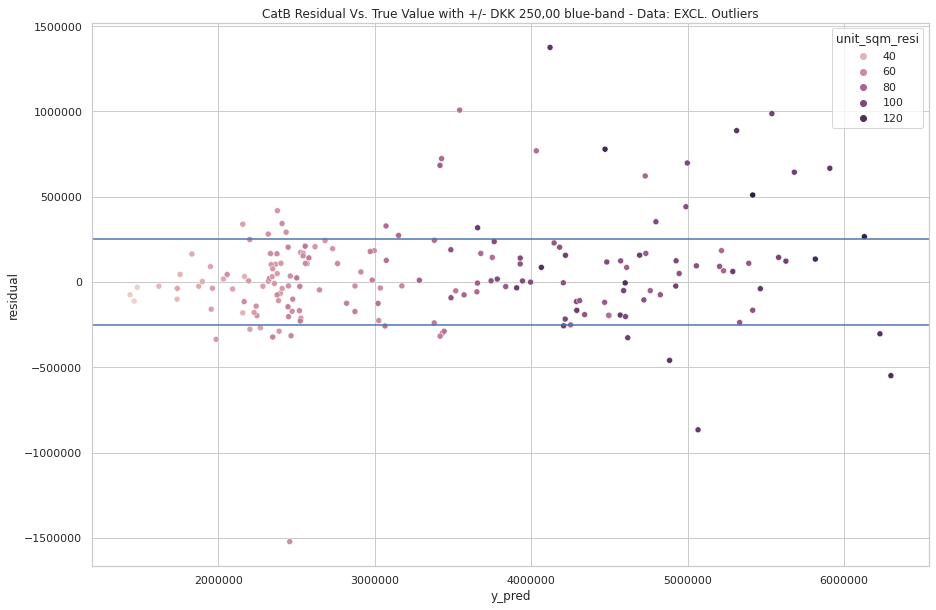

<Figure size 7200x7200 with 0 Axes>

In [ ]:
# make results dataframe
df_results = X_test

df_results['y_true'] = y_true
df_results['y_pred'] = np.round(y_pred)
df_results['residual'] = df_results['y_true'] - df_results['y_pred'] 
df_results['residual_abs'] = abs(df_results['y_true'] - df_results['y_pred'])


# make chart for pred. and residuals 
sns.set(style='whitegrid', rc={"figure.figsize":(15, 10)})
 
sns.scatterplot(x= df_results.y_pred,
                    y=df_results.residual,
                    data=df_results,
                    hue=df_results.unit_sqm_resi,                   
                    )
plt.title('CatB Residual Vs. True Value with +/- DKK 250,00 blue-band - Data: EXCL. Outliers')

# ax lines 
plt.axhline(250000)
plt.axhline(-250000)

plt.ticklabel_format(style='plain')
plt.figure(figsize=(100,100))

print(len(y_pred))

In [ ]:
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MAE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 20000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0

### Feature Importance

In [ ]:
# the bult-in function
np.array(cat_model.get_feature_importance(prettified=True))

array([['gov_property_value', 26.337689472780212],
       ['unit_sqm_resi', 17.535087085617953],
       ['latitude', 11.06977978558623],
       ['gov_sqm', 9.81753048124906],
       ['year', 9.382829494174933],
       ['rooms', 5.092272970569035],
       ['longitude', 3.6581381199637684],
       ['floor', 3.234860229251799],
       ['bfe', 2.8827192145986085],
       ['street_name', 2.6250067194059197],
       ['gov_land_value', 2.4913073024986443],
       ['month', 2.0587521769307378],
       ['building_year', 2.0420591143490636],
       ['street_number', 1.7719678330240345]], dtype=object)

In [ ]:
# loss function change. If a feature is minus it can be removed. But here all features have an influence on the loss

np.array(cat_model.get_feature_importance(
    train_dataset,
    'LossFunctionChange',
    prettified=True))

array([['gov_property_value', 257124.16993965235],
       ['unit_sqm_resi', 168154.35028623257],
       ['year', 138001.3981631101],
       ['gov_sqm', 132257.2013861553],
       ['latitude', 104805.28090196036],
       ['rooms', 70598.6880904038],
       ['floor', 47985.29628245899],
       ['longitude', 34365.15119308469],
       ['month', 30776.67103291853],
       ['bfe', 19945.7096133061],
       ['gov_land_value', 18202.397868314292],
       ['building_year', 12253.792972392781],
       ['street_number', 9633.331484640279],
       ['street_name', 6604.496927210945]], dtype=object)

In [ ]:
# use feature_importances_, which is similar to the built-in function

feature_scores = pd.Series(cat_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

gov_property_value    26.337689
unit_sqm_resi         17.535087
latitude              11.069780
gov_sqm                9.817530
year                   9.382829
rooms                  5.092273
longitude              3.658138
floor                  3.234860
bfe                    2.882719
street_name            2.625007
gov_land_value         2.491307
month                  2.058752
building_year          2.042059
street_number          1.771968
dtype: float64

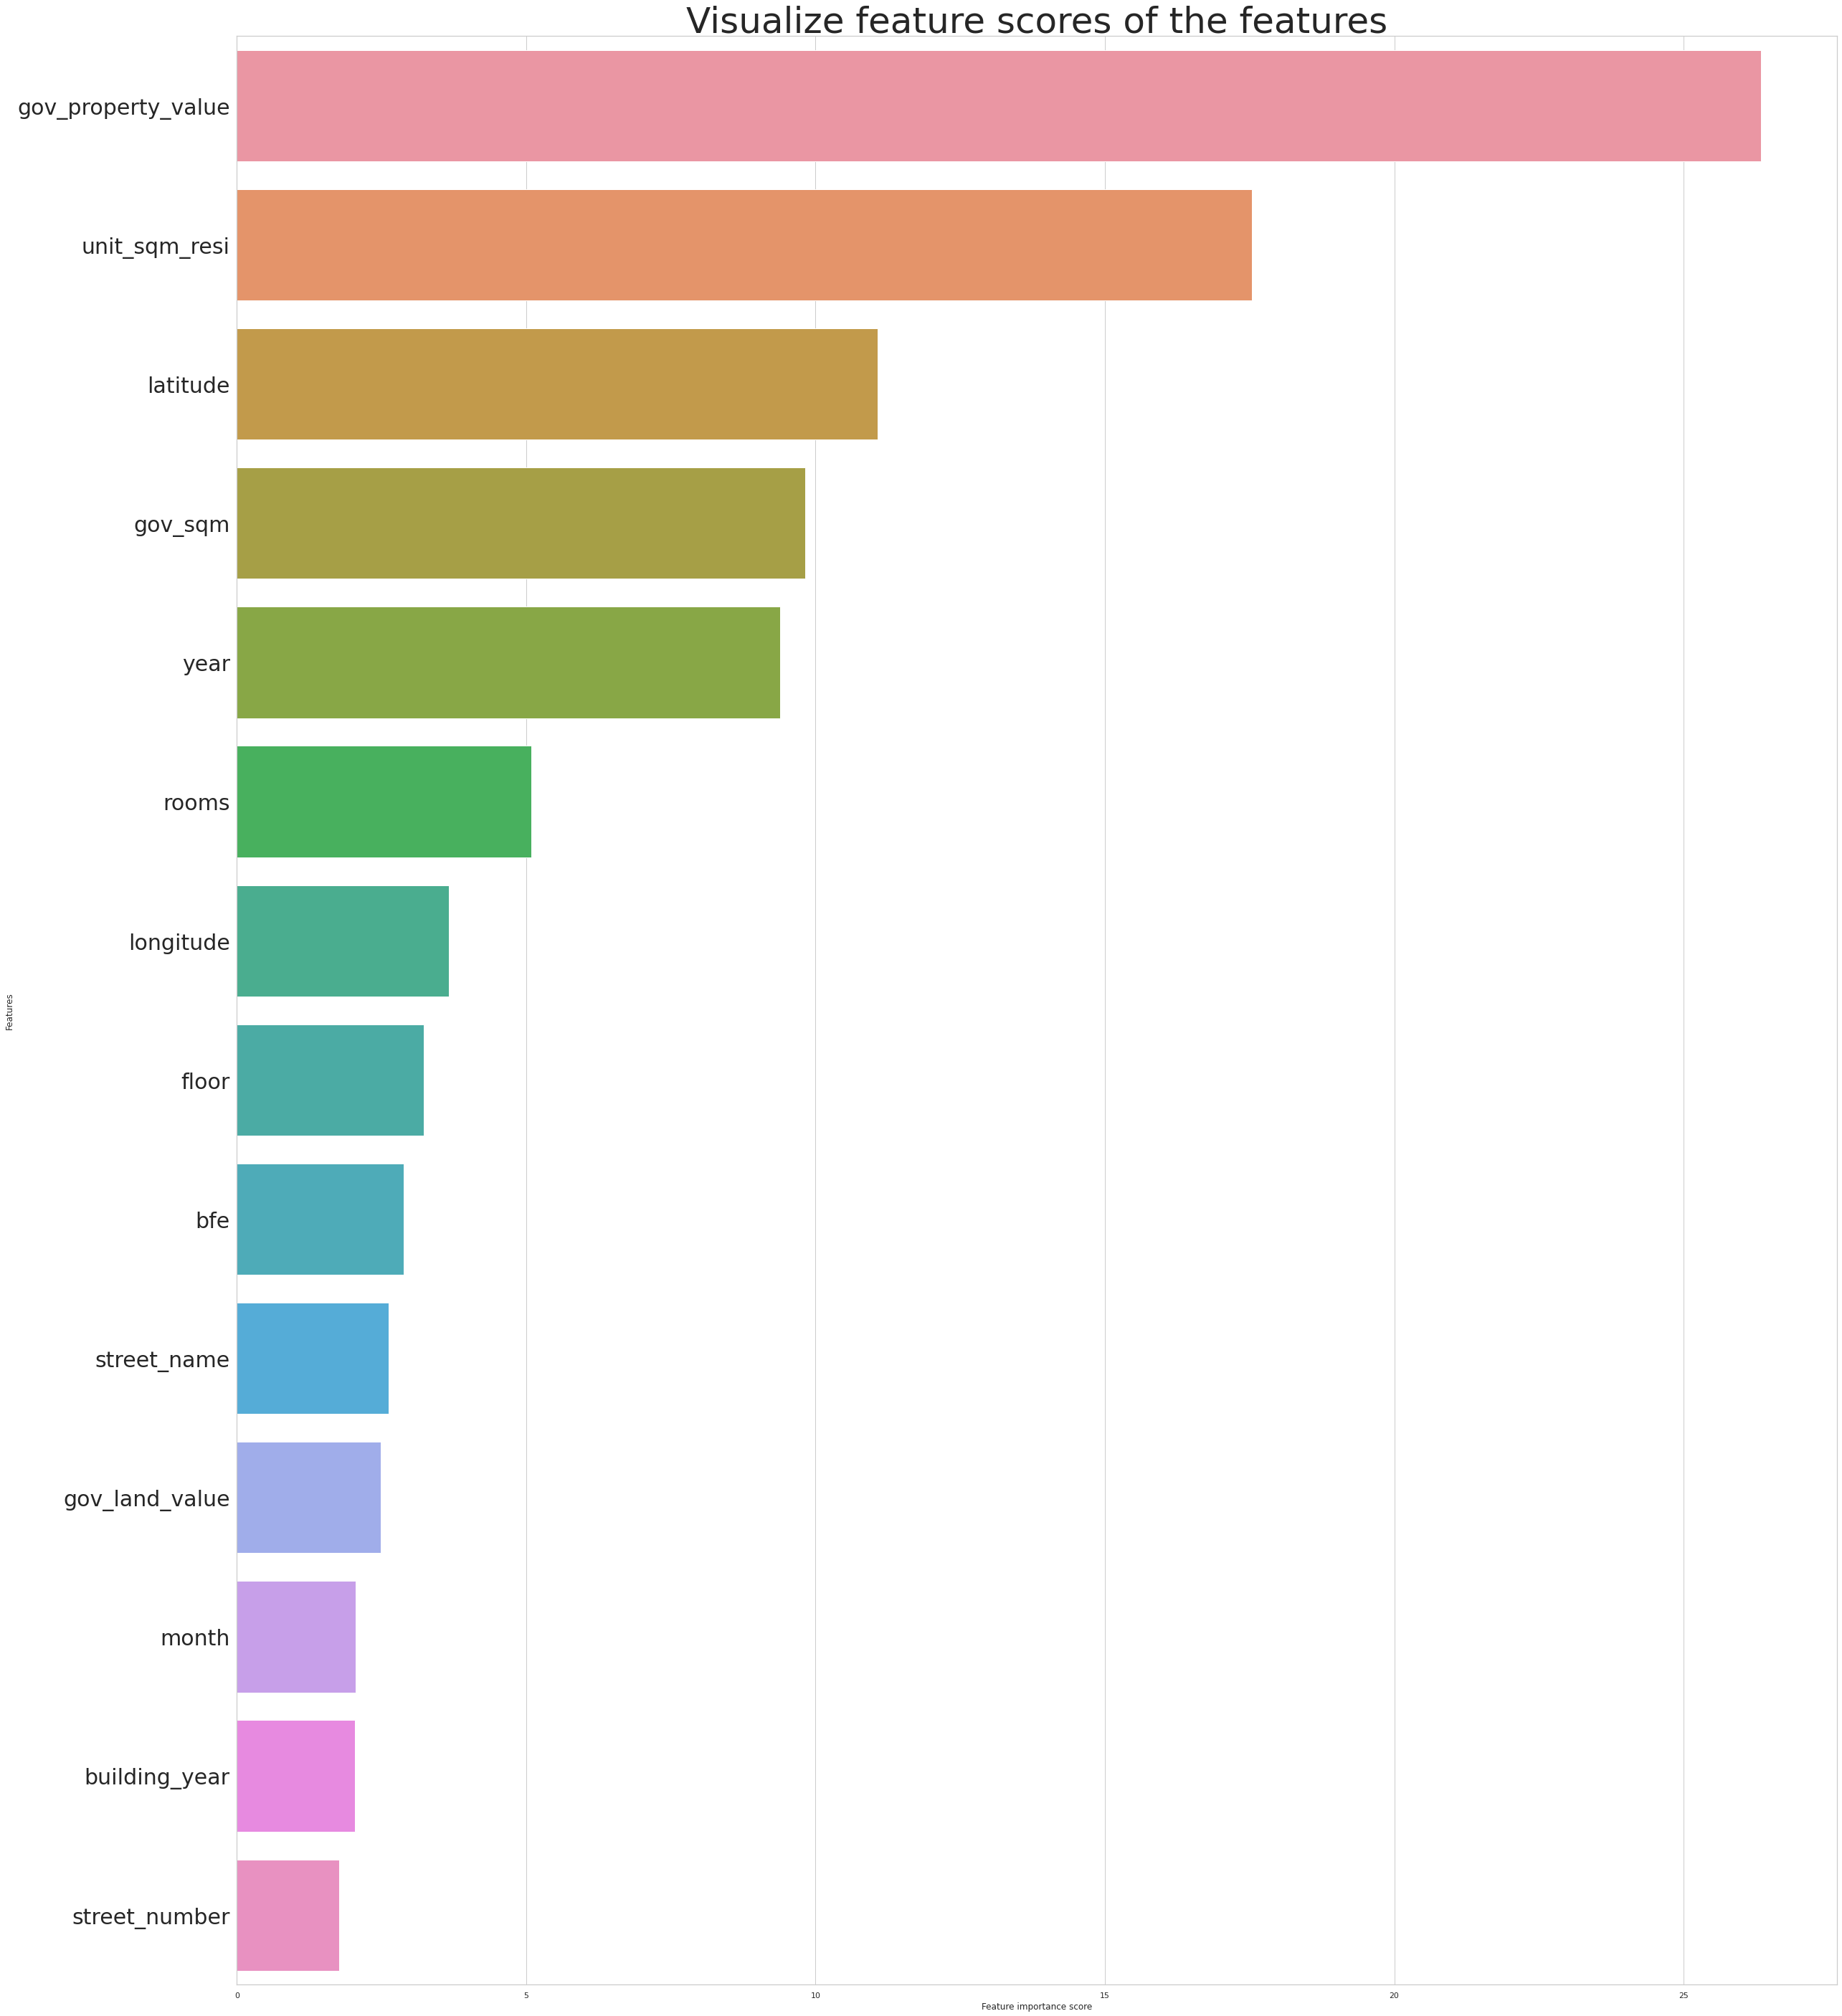

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(40, 50))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features", fontsize=50)
ax.set_yticklabels(feature_scores.index, fontsize=30)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Save model

In [ ]:
#save model to folder
with open('cat_model_pkl', 'wb') as files:
    pickle.dump(cat_model, files)

In [ ]:
# load saved model
"""
with open('cat_model_pkl' , 'rb') as f:
    cat_model = pickle.load(f)
"""
#cat_model.predict()

"\nwith open('cat_model_pkl' , 'rb') as f:\n    cat_model = pickle.load(f)\n"

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a2d9d23-5445-401b-81ac-9e4d2df66dba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>